<a href="https://colab.research.google.com/github/sharp-guy-dev/arboles_decision_platzi/blob/main/decision_tree_random_forest_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto práctico: árbol de decisión y random forest con scikit-learn

In [28]:
#Importamos las librerias principales
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

Utilizaremos el **Car Evaluation Data Set** de Kaggle: https://www.kaggle.com/datasets/elikplim/car-evaluation-data-set

In [29]:
#Cargamos dataset a utilizar
df_car = pd.read_csv('/content/sample_data/car_evaluation.csv', header=None)

## Análisis exploratorio de datos

In [30]:
#Visualizacion del dataframe
df_car.head(10)

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
5,vhigh,vhigh,2,2,med,high,unacc
6,vhigh,vhigh,2,2,big,low,unacc
7,vhigh,vhigh,2,2,big,med,unacc
8,vhigh,vhigh,2,2,big,high,unacc
9,vhigh,vhigh,2,4,small,low,unacc


In [31]:
#Analizamos el shape del objeto
print(df_car.shape)

(1728, 7)


In [32]:
#Como podemos observar vamos a renombrar las columnas de manera correcta
col_names=['buying','maint','doors','persons','lug_boot','safety','class']
df_car.colums = col_names

<ipython-input-32-9e676ddc7032>:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df_car.colums = col_names


In [33]:
#Vericamos la transformacion
df_car.head(10)

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
5,vhigh,vhigh,2,2,med,high,unacc
6,vhigh,vhigh,2,2,big,low,unacc
7,vhigh,vhigh,2,2,big,med,unacc
8,vhigh,vhigh,2,2,big,high,unacc
9,vhigh,vhigh,2,4,small,low,unacc


In [26]:
#Visualizamos los tipos de datos
df_car.dtypes

0    object
1    object
2    object
3    object
4    object
5    object
6    object
dtype: object

Primer resumen de los datos:
* Hay 7 variables en el conjunto de datos. Todas las variables son de tipo de datos categóricos.
* Estos se dan por compra, mantenimiento, puertas, personas, lug_boot, seguridad y clase.
* La clase es la variable de destino o target.

In [34]:
# Exploremos un poco mas la variable target
df_car[6].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: 6, dtype: int64

In [35]:
#Verificamos valores missings
df_car.isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
dtype: int64

## Procesamiento de datos

In [36]:
#Separamos en X e y
X = df_car.drop([6], axis = 1)
y = df_car[6]

In [37]:
#Importamos las librerias necesarias para la creacion del modelo
from sklearn.model_selection import train_test_split

#30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [38]:
#Veamos que obtuvimos
X_train.shape, X_test.shape

((1209, 6), (519, 6))

In [39]:
y_train.shape, y_test.shape

((1209,), (519,))

In [40]:
#Veamos que tenemos. Por ejemplo, en X_train
X_train.head()

,0,1,2,3,4,5
1178,med,med,5more,4,big,high
585,high,high,3,more,small,low
1552,low,med,3,4,med,med
1169,med,med,5more,2,big,high
1033,med,high,4,2,big,med


In [41]:
X_train.dtypes

0    object
1    object
2    object
3    object
4    object
5    object
dtype: object

## Entrenamiento de modelo de clasificación con árbol de decisión

In [42]:
!pip install category-encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 KB 8.5 MB/s eta 0:00:00


In [44]:
#Importante: todos nuestros tipos de datos son object, realizamos una transformacion
import category_encoders as ce

encoder = ce.OrdinalEncoder(cols = [0, 1, 2, 3, 4, 5])

X_train = encoder.fit_transform(X_train)

X_test = encoder.fit_transform(X_test)

In [45]:
#Verificamos la transformacion
X_train.head()

,0,1,2,3,4,5
1178,1,1,1,1,1,1
585,2,2,2,2,2,2
1552,3,1,2,1,3,3
1169,1,1,1,3,1,1
1033,1,2,3,3,1,3


In [46]:
#Importar árbol de decisión
from sklearn.tree import DecisionTreeClassifier

#Creacion del modelo
tree = DecisionTreeClassifier(max_depth=2, random_state=0)

In [47]:
#Entrenamiento
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [48]:
#Calculo de las predicciones en Train y Test
y_train_pred_tree = tree.predict(X_train)
y_test_pred_tree = tree.predict(X_test)

In [49]:
y_train_pred_tree

array(['acc', 'unacc', 'unacc', ..., 'acc', 'unacc', 'unacc'],
      dtype=object)

## Evaluación de modelo de clasificación con árbol de decisión

In [52]:
#Calculo de metricas 
from sklearn.metrics import accuracy_score

#Calculo el accuracy en Train
train_accuracy_tree = accuracy_score(y_train, y_train_pred_tree)

#Calculo el accuracy en Test
test_accuracy_tree = accuracy_score(y_test, y_test_pred_tree)

print('El accuracy en train es: ', train_accuracy_tree)
print('El accuracy en test es: ', test_accuracy_tree)

El accuracy en train es:  0.7733664185277088
El accuracy en test es:  0.626204238921002


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


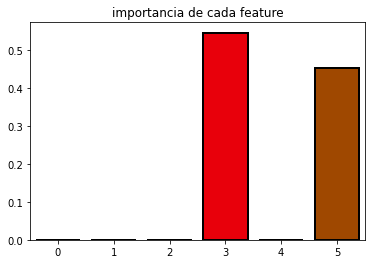

In [53]:
#Verificamos el feature importances
import seaborn as sns
importances = tree.feature_importances_
columns = X.columns
sns.barplot(columns, importances, palette = 'bright', saturation = 2.0, edgecolor = 'black', linewidth = 2)
plt.title('importancia de cada feature')
plt.show()

## Entrenamiento de modelo de clasificación con random forest

In [ ]:
#Importar random forest


In [ ]:
#Calculo de las predicciones en Train y Test


## Evaluación de modelo de clasificación con random forest

In [ ]:
#Calculo de metricas 


#Calculo el accuracy en Train


#Calculo el accuracy en Test


#Importante: podriamos reducir el numero de estimadores para disminuir el sobreajuste del modelo.

In [ ]:
# Visualizacion de las feature importantes


In [ ]:
#Grafico de barras


In [ ]:
# Matriz de confusion del RF


In [ ]:
#RF
